In [1]:
import pandas as pd
import matplotlib.pyplot as plt
zone = pd.read_csv("land-use-zoning.csv", sep=",")
zone.head(10)

,Neighborhood,Sector #,Population (2010),Land Area (acres),Residential,Mixed Use / Commercial,Mixed Use / Industrial,Institutional / Edu. / Med.,Open Space,Hillside,Special Land Use
0,Allegheny Center,3,933,134.4,0.0%,49.4%,0.0%,0.0%,50.6%,0.0%,0.0%
1,Allegheny West,3,462,90.2,42.1%,12.5%,6.3%,26.4%,12.6%,0.0%,0.0%
2,Allentown,6,"2,500",188.8,54.6%,9.3%,0.0%,0.0%,18.5%,17.6%,0.0%
3,Arlington,7,"1,869",300.8,43.7%,3.8%,10.9%,0.0%,41.6%,0.0%,0.0%
4,Arlington Heights,7,244,84.5,56.5%,0.0%,0.0%,0.0%,43.4%,0.0%,0.0%
5,Banksville,5,"4,144",620.2,72.0%,7.8%,4.9%,0.0%,15.2%,0.0%,0.0%
6,Bedford Dwellings,15,"1,202",114.6,59.5%,0.0%,2.7%,0.0%,37.6%,0.2%,0.0%
7,Beechview,5,"7,974",934.4,56.4%,4.4%,1.3%,0.0%,2.4%,35.5%,0.0%
8,Beltzhoover,6,"1,925",269.4,64.7%,2.7%,1.3%,0.0%,20.0%,11.3%,0.0%
9,Bloomfield,12,"8,442",449.3,58.1%,25.8%,6.9%,3.6%,1.7%,3.9%,0.0%


I start by opening the file and viewing the first 10 rows to check everything is working.

In [27]:
zoning_score = dict()

for index,row in zone.iterrows():
    name = row[0]
    average = 0.0
    for i in range(4,8):
        average += float(row[i][:-1])
    average = average/4
    zoning_score[name] = average
    
zoning_score

{'Allegheny Center': 12.35,
 'Allegheny West': 21.825,
 'Allentown': 15.975000000000001,
 'Arlington': 14.6,
 'Arlington Heights': 14.125,
 'Banksville': 21.175,
 'Bedford Dwellings': 15.55,
 'Beechview': 15.524999999999999,
 'Beltzhoover': 17.175,
 'Bloomfield': 23.6,
 'Bluff': 18.975,
 'Bon Air': 12.774999999999999,
 'Brighton Heights': 16.95,
 'Brookline': 19.549999999999997,
 'California-Kirkbride': 16.9,
 'Carrick': 18.35,
 'Central Business District': 0.1,
 'Central Lawrenceville': 10.875,
 'Central Northside': 23.799999999999997,
 'Central Oakland': 14.375,
 'Chartiers City': 19.425,
 'Chateau': 18.175,
 'Crafton Heights': 19.424999999999997,
 'Crawford-Roberts': 21.475,
 'Duquesne Heights': 10.275,
 'East Allegheny': 16.475,
 'East Carnegie': 15.649999999999999,
 'East Hills': 24.4,
 'East Liberty': 23.799999999999997,
 'Elliott': 10.724999999999998,
 'Esplen': 24.075000000000003,
 'Fairywood': 20.875,
 'Fineview': 12.674999999999999,
 'Friendship': 24.799999999999997,
 'Garfie

I then generate a score by averaging percent area of residential, industrial, commercial, and institutional area.   
This is based on the assumption that the optimal neighborhood would have a balenced array of zoning.

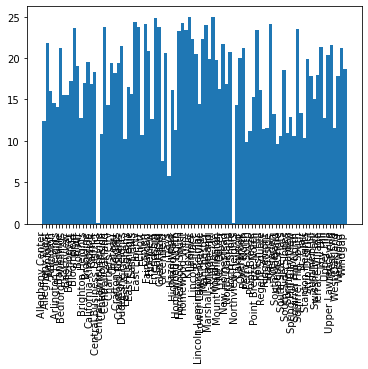

In [25]:
plt.bar(range(len(zoning_score)), list(zoning_score.values()), align='edge', width = 1)
plt.xticks(range(len(zoning_score)), list(zoning_score.keys()),rotation = 90)
plt.show()

As you can see we may have a few too many data points. So lets get rid of the useless data

In [31]:
score_av = 0.0
for x in zoning_score:
    score_av+=zoning_score[x]
score_av = score_av/len(zoning_score)
remove = []
for x in zoning_score:
    if zoning_score[x]<score_av:
        remove.append(x)
for x in remove:
    zoning_score.pop(x)
zoning_score

{'Allegheny West': 21.825,
 'Banksville': 21.175,
 'Beltzhoover': 17.175,
 'Bloomfield': 23.6,
 'Bluff': 18.975,
 'Brookline': 19.549999999999997,
 'Carrick': 18.35,
 'Central Northside': 23.799999999999997,
 'Chartiers City': 19.425,
 'Chateau': 18.175,
 'Crafton Heights': 19.424999999999997,
 'Crawford-Roberts': 21.475,
 'East Hills': 24.4,
 'East Liberty': 23.799999999999997,
 'Esplen': 24.075000000000003,
 'Fairywood': 20.875,
 'Friendship': 24.799999999999997,
 'Garfield': 23.75,
 'Greenfield': 20.625000000000004,
 'Homewood North': 23.3,
 'Homewood South': 24.200000000000003,
 'Homewood West': 23.4,
 'Knoxville': 24.975,
 'Larimer': 22.25,
 'Lincoln Place': 20.45,
 'Lower Lawrenceville': 22.3,
 'Manchester': 23.924999999999997,
 'Marshall-Shadeland': 19.925,
 'Middle Hill': 25.0,
 'Morningside': 19.700000000000003,
 'Mt. Oliver': 21.75,
 'North Oakland': 20.725,
 'Oakwood': 19.975,
 'Overbrook': 21.200000000000003,
 'Point Breeze North': 23.375,
 'Shadyside': 24.099999999999998,


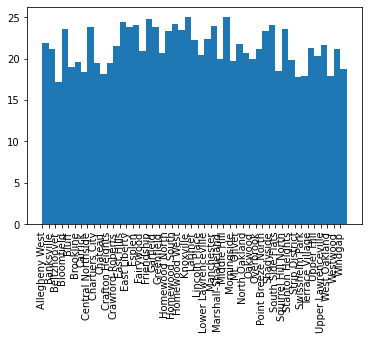

In [34]:
plt.bar(range(len(zoning_score)), list(zoning_score.values()), align='edge', width = 1)
plt.xticks(range(len(zoning_score)), list(zoning_score.keys()),rotation = 90)
plt.show()

Now we can see all the above average scores